In [1]:
import tensorflow as tf

In [2]:
print(tf.config.list_physical_devices('GPU'))

[]


In [3]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("vipoooool/new-plant-diseases-dataset")

# print("Path to dataset files:", path)

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Training Image Preprocessing

In [5]:
training_set=tf.keras.utils.image_dataset_from_directory(
    './Dataset/train',
    labels="inferred",  # Folder become LAbel name
    label_mode="categorical", #multiple classes
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128 ),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


In [6]:
validation_set=tf.keras.utils.image_dataset_from_directory(
    './Dataset/valid',
    labels="inferred",  # Folder become LAbel name
    label_mode="categorical", #multiple classes
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128 ),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


## Building Model

In [7]:
from tensorflow.keras.layers import Conv2D,Dense,MaxPool2D,Flatten,Dense, Dropout
from tensorflow.keras.models import Sequential

In [8]:
model=Sequential()
model.add(Conv2D(32, kernel_size=3, padding='same', activation='relu', input_shape=[128,128,3]))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [9]:
model.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(64, kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [10]:
model.add(Conv2D(128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Conv2D(512, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(512, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Dropout(0.25)) # To avoid overfitting

In [14]:
model.add(Flatten())
model.add(Dense(units=1500, activation='relu'))  # Reduce further if needed


In [15]:
model.add(Dropout(0.4))

In [16]:

import subprocess

def get_vram_nvidia():
    result = subprocess.run(["nvidia-smi", "--query-gpu=memory.total,memory.used,memory.free", "--format=csv,noheader,nounits"], capture_output=True, text=True)
    total, used, free = map(int, result.stdout.strip().split(", "))
    
    print(f"Total VRAM: {total} MB")
    print(f"Used VRAM: {used} MB")
    print(f"Free VRAM: {free} MB")

get_vram_nvidia()



Total VRAM: 4096 MB
Used VRAM: 130 MB
Free VRAM: 3836 MB


In [17]:
model.add(Dense(units=38,activation='softmax'))

## Compiling Model

In [18]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

## Model Training

### To avoid loss overshooting:

- Choose smaller learning rate
- Increase no. of nuerons to prevent underfitting
- Increase no. of convolution layers to extract more features

In [21]:
training_history=model.fit(x=training_set,validation_data=validation_set,epochs=5)

Epoch 1/5
2197/2197 [==============================] - 4437s 2s/step - loss: 1.1285 - accuracy: 0.6586 - val_loss: 0.5822 - val_accuracy: 0.8160
Epoch 2/5
1918/2197 [=========================>....] - ETA: 10:01 - loss: 0.4589 - accuracy: 0.8541

KeyboardInterrupt: 

## Model Evaluation

### Model Evaluation on Trainig set

In [ ]:
train_loss,train_acc=model.evaluate(training_set)

2197/2197 [==============================] - 62s 28ms/step - loss: 0.0316 - accuracy: 0.9896


In [ ]:
print(train_acc,train_loss)

0.9895582795143127 0.031638775020837784


In [ ]:
valid_loss,valid_acc=model.evaluate(validation_set)
print(valid_acc,valid_loss)

550/550 [==============================] - 17s 30ms/step - loss: 0.1233 - accuracy: 0.9640
0.9639768004417419 0.1232963502407074


## Saving the Model

In [ ]:
model.save("plant_disease_predictor.keras")

In [ ]:
import json
with open("training_history","w") as f:
    json.dump(training_history.history,f)

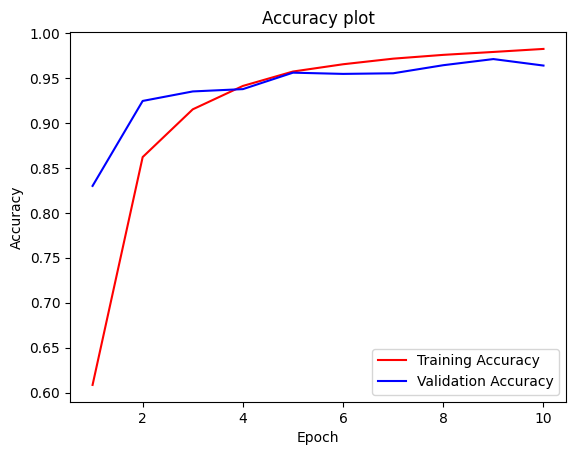

In [ ]:
epochs=list(range(1,11))
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy plot")
plt.legend()
plt.show()

In [ ]:
class_name=validation_set.class_names

In [ ]:
test_set=tf.keras.utils.image_dataset_from_directory(
    './Dataset/valid',
    labels="inferred",  # Folder become LAbel name
    label_mode="categorical", #multiple classes
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128 ),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [ ]:
y_pred=model.predict(test_set)

550/550 [==============================] - 15s 26ms/step


In [ ]:
predicted_categories=tf.argmax(y_pred,axis=1)

In [ ]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [ ]:
true_categories= tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [ ]:
Y_true=tf.argmax(true_categories,axis=1 )

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_true,predicted_categories, target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.95      0.94      0.95       504
                                 Apple___Black_rot       0.94      0.99      0.97       497
                          Apple___Cedar_apple_rust       0.99      0.96      0.97       440
                                   Apple___healthy       0.97      0.92      0.95       502
                               Blueberry___healthy       0.96      0.98      0.97       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.97      0.98       421
                 Cherry_(including_sour)___healthy       0.97      1.00      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.92      0.94       410
                       Corn_(maize)___Common_rust_       1.00      0.99      1.00       477
               Corn_(maize)___Northern_Leaf_Blight       0.95      0.95      0.

In [ ]:
cm=confusion_matrix(Y_true,predicted_categories)
cm

array([[474,  18,   0, ...,   0,   0,   0],
       [  0, 494,   0, ...,   0,   0,   0],
       [  0,   2, 421, ...,   0,   0,   1],
       ...,
       [  0,   0,   0, ..., 477,   0,   0],
       [  0,   0,   0, ...,   0, 447,   0],
       [  1,   0,   0, ...,   0,   1, 457]], dtype=int64)

<Axes: >

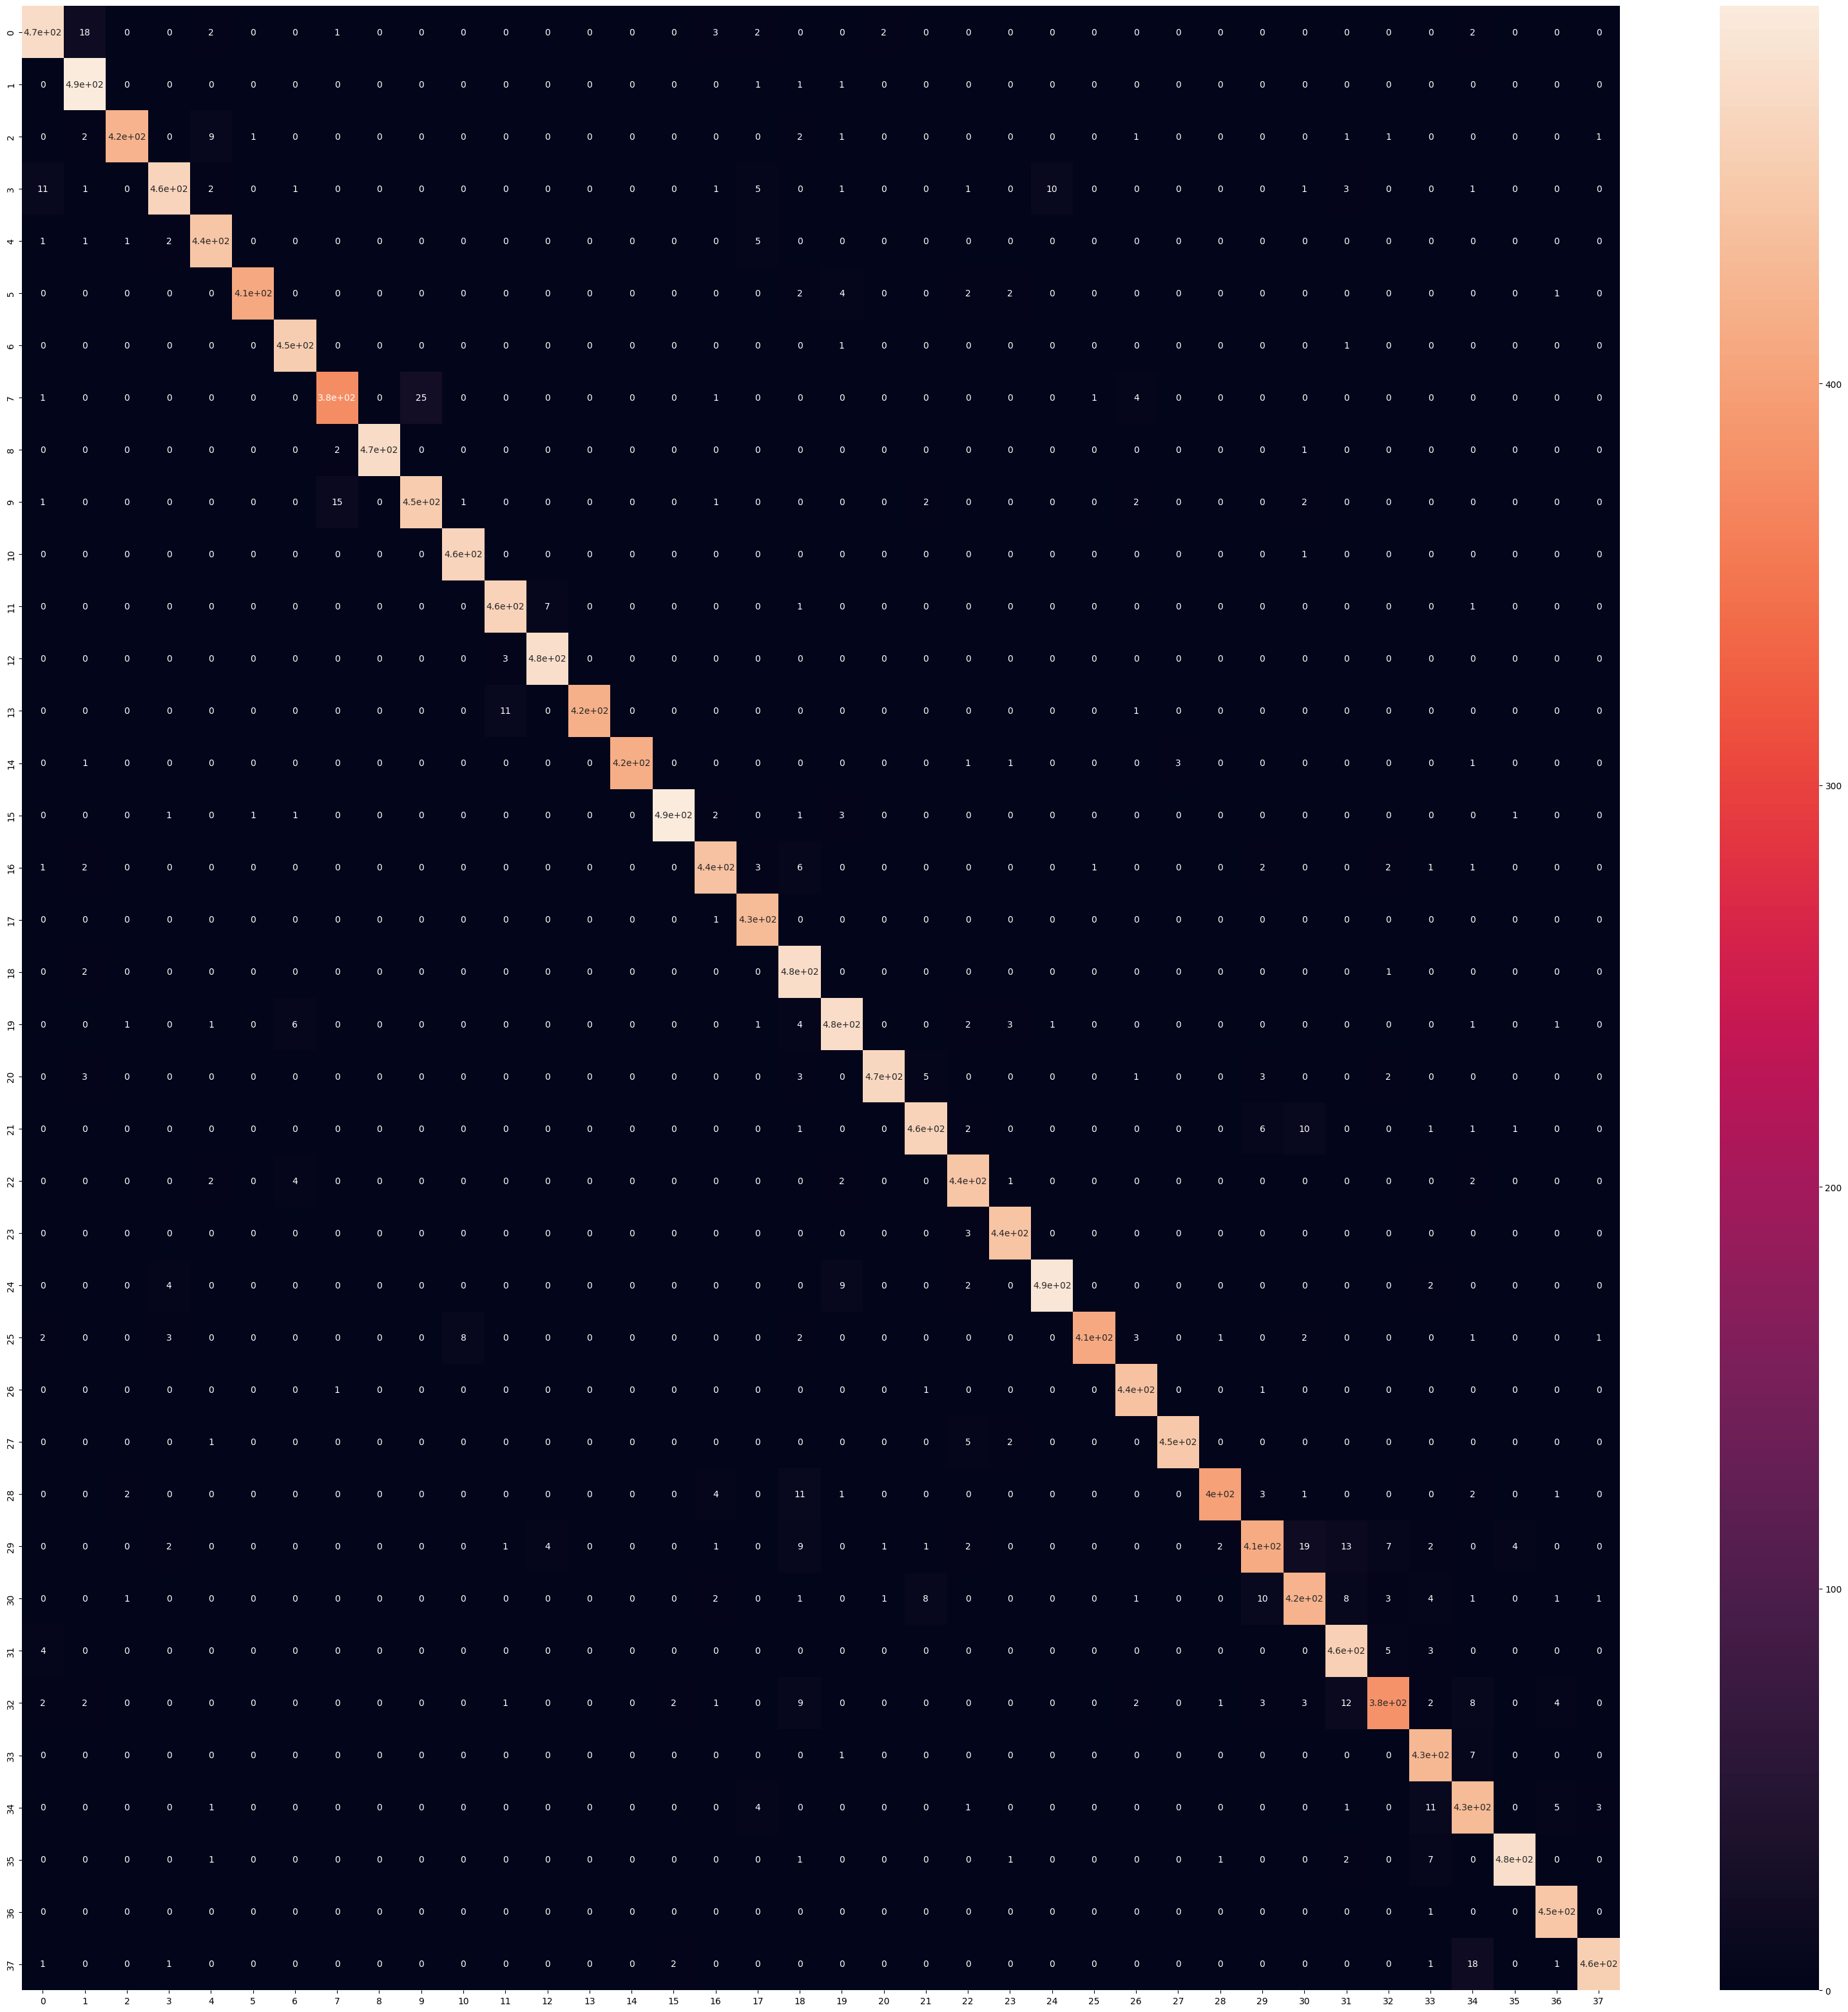

In [ ]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})

In [ ]:
class_name=validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_